<a href="https://colab.research.google.com/github/Srijan2024/oibsip_taskno/blob/main/UNEMPLOYMENT_ANALYSIS_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas

In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
df=pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [4]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [5]:
df=df.dropna()

In [6]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [7]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [8]:
df[' Estimated Unemployment Rate (%)'].describe()

count    267.000000
mean      12.236929
std       10.803283
min        0.500000
25%        4.845000
50%        9.650000
75%       16.755000
max       75.850000
Name:  Estimated Unemployment Rate (%), dtype: float64

In [9]:
df[' Date']

0       31-01-2020
1       29-02-2020
2       31-03-2020
3       30-04-2020
4       31-05-2020
          ...     
262     30-06-2020
263     31-07-2020
264     31-08-2020
265     30-09-2020
266     31-10-2020
Name:  Date, Length: 267, dtype: object

In [10]:
df[' Date']=pd.to_datetime(df[' Date'], dayfirst=True)
df[' Date']

0     2020-01-31
1     2020-02-29
2     2020-03-31
3     2020-04-30
4     2020-05-31
         ...    
262   2020-06-30
263   2020-07-31
264   2020-08-31
265   2020-09-30
266   2020-10-31
Name:  Date, Length: 267, dtype: datetime64[ns]

In [11]:
df.set_index(df[' Date'], inplace=True)

In [12]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,,
2020-01-31,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740
2020-02-29,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740
2020-03-31,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740
2020-04-30,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740
2020-05-31,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
2020-06-30,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855
2020-07-31,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855
2020-08-31,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855


[]

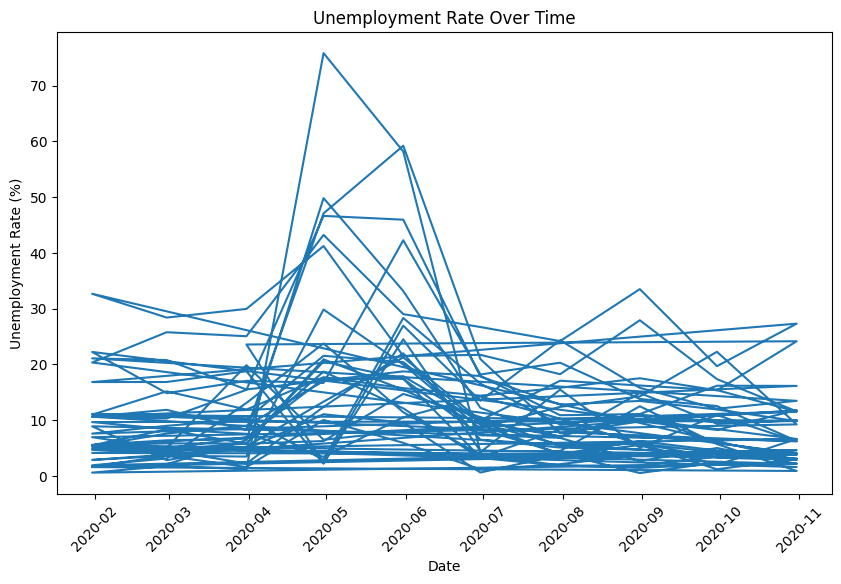

In [13]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df[' Estimated Unemployment Rate (%)'])
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.xticks(rotation=45)
plt.plot()

In [14]:
avg_unemployment= df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()
avg_unemployment

Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name:  Estimated Unemployment Rate (%), dtype: float64

[]

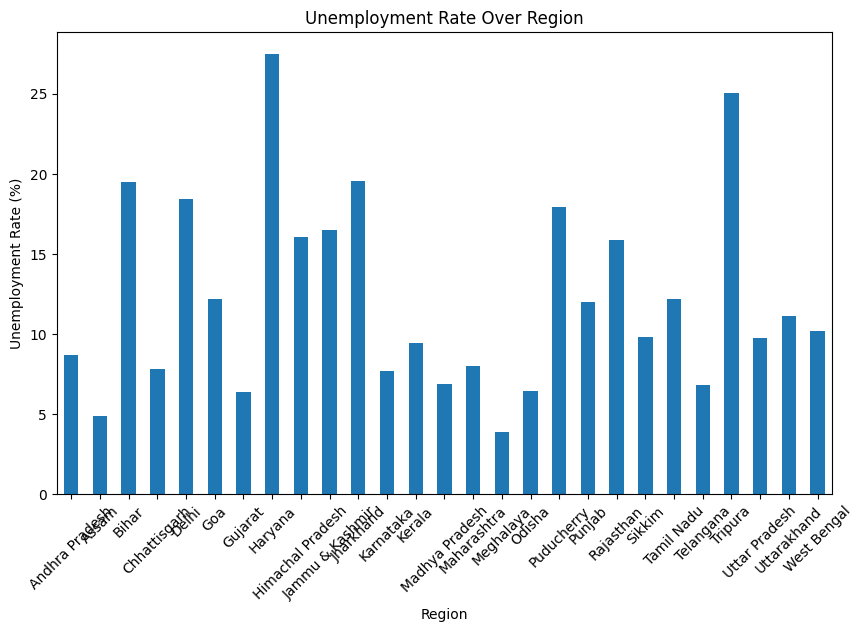

In [15]:
plt.figure(figsize=(10,6))
avg_unemployment.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate Over Region')
plt.xticks(rotation=45)
plt.plot()

In [16]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
Date,,,,,,,,,
2020-01-31,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.740
2020-02-29,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.740
2020-03-31,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.740
2020-04-30,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.740
2020-05-31,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
2020-06-30,West Bengal,2020-06-30,M,7.29,30726310,40.39,East,22.9868,87.855
2020-07-31,West Bengal,2020-07-31,M,6.83,35372506,46.17,East,22.9868,87.855
2020-08-31,West Bengal,2020-08-31,M,14.87,33298644,47.48,East,22.9868,87.855


In [17]:
event_date = pd.to_datetime('2020-03-01')
before_event = df[df[' Date'] < event_date]
after_event = df[df[' Date'] >= event_date]

avg_unemployment_before = before_event[' Estimated Unemployment Rate (%)'].mean()
avg_unemployment_after = after_event[' Estimated Unemployment Rate (%)'].mean()


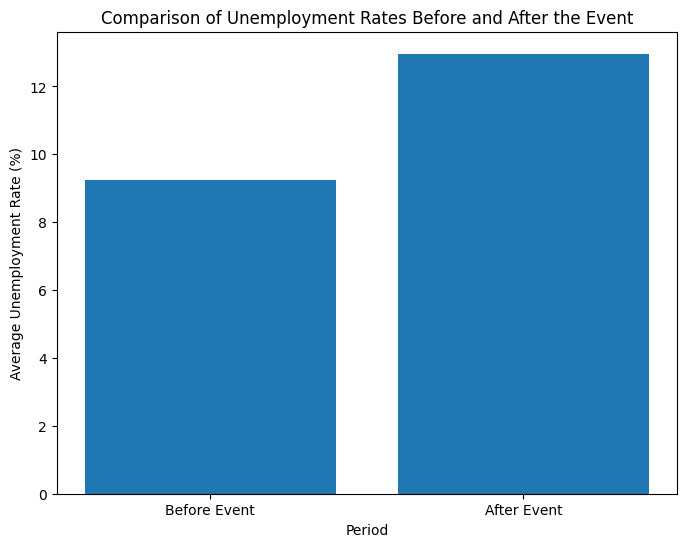

In [18]:
plt.figure(figsize=(8, 6))
plt.bar(['Before Event', 'After Event'], [avg_unemployment_before, avg_unemployment_after])
plt.xlabel('Period')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Comparison of Unemployment Rates Before and After the Event')
plt.show()